#### Toy simulation with synthetic values

In [ ]:
import model as m 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
para = m.ModelParams(
    age_strucure=[0,1, 5, 10, 15, 20, 30],
    B=11e-3,
    V=np.zeros([7]),
    d=[0, 0 , 0 ,0 ,0 ,0 ,9.1e-3],
    gamma=(1.0/14.0*365.0*1e-3)*np.ones([7]),
    C=np.eye(7),
    N=1
)

In [4]:
beta=np.eye(7)*1.2

In [5]:
mdl = m.SIRVModel(para, lambda t: beta)

Reading data for each disease to understand the time point lengths

In [6]:
import pandas as pd

#Select disease
d = "Measles"

#monthly data
monthly_data = pd.read_csv( d +'_data_processed.csv')
time_date = monthly_data.iloc[:,0]

#cumulative monthly data
ecdc_disease_noTime = monthly_data.drop("Time", axis=1)
cumulative_data = ecdc_disease_noTime.apply(lambda x: np.cumsum(x))

In [7]:
print(time_date[0])
print(time_date[len(time_date)-1])

print("2019 - 1999=", 2019-1999+1, "--> tmax")

1999-01
2019-12
2019 - 1999= 21 --> tmax


In [13]:
out, t = mdl.run(np.hstack([0.95*(1./6)*np.ones(7), 0.05*(1./6)*np.ones(7), np.zeros(7*2)]), 
                 t_max = 21,method="RK45", eval_per_year=24)

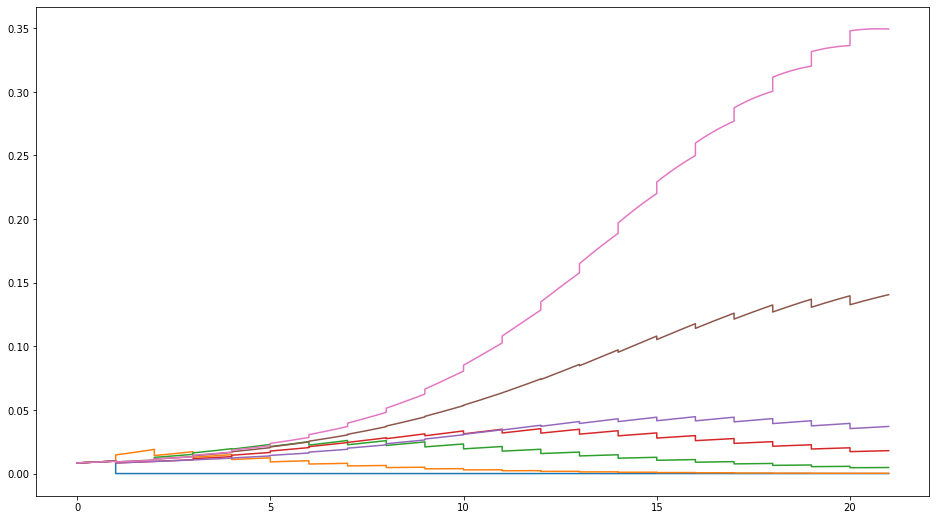

In [33]:
out[7:(7*2),:]
plt.figure(figsize=(16,9))
plt.plot(t, np.transpose(out[7:(7*2),:]))